In [1]:
import numpy as np
import random

class KArmBandit:
    def __init__(self, k, epsilon=0.1):
        self.k = k  # Number of arms
        self.epsilon = epsilon  # Exploration rate
        self.counts = np.zeros(k)  # Number of times each arm was selected
        self.values = np.zeros(k)  # Estimated value (average reward) for each arm

    def select_arm(self):
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.k - 1)  # Explore: randomly select an arm
        else:
            return np.argmax(self.values)  # Exploit: choose the best arm

    def update(self, chosen_arm, reward):
        # Update counts and estimated values
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        
        # Incremental update for average reward
        self.values[chosen_arm] = value + (1 / n) * (reward - value)

# Example: Simulate user response with predefined probabilities for each arm
user_click_probs = [0.1, 0.2, 0.05, 0.4, 0.3]  
k = len(user_click_probs)
agent = KArmBandit(k=k, epsilon=0.1)


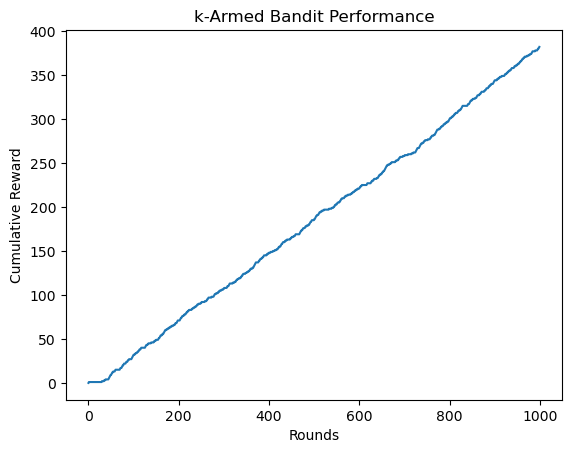

In [3]:
def simulate(agent, user_click_probs, rounds=1000):
    total_reward = 0
    rewards = []

    for _ in range(rounds):
        # Agent selects an arm (recommendation)
        chosen_arm = agent.select_arm()
        
        # Simulate user response (reward) based on true click probability
        reward = 1 if random.uniform(0, 1) < user_click_probs[chosen_arm] else 0
        
        # Update agent's knowledge
        agent.update(chosen_arm, reward)
        
        # Track rewards
        total_reward += reward
        rewards.append(total_reward)

    return rewards

rewards = simulate(agent, user_click_probs)

# Plot cumulative reward over time
import matplotlib.pyplot as plt

plt.plot(rewards)
plt.xlabel("Rounds")
plt.ylabel("Cumulative Reward")
plt.title("k-Armed Bandit Performance")
plt.show()
